# MONTANA DATA REVIEW

#### Items needing fact checking are denoted in the draft by an "FC" comment. Check them here, denoting each with the sentence/fact you are checking in the draft. Update the related FC comment in the draft when you confirm or deny the finding.

##### TO-DO's per Matt's review
* TODO get all stops
* TODO filter to consent searches
* TODO group by race, get consent search rate (searches/stops)
* TODO derive arrest rate for consent-searched NA, white drivers (arrests/searches)
* TODO filter by geography (flathead, or the district it belongs to)
* TODO rerun consent search rate for flathead
* TODO etc

### Setup

In [14]:
# Libraries

library(tidyverse)
library(lubridate)

In [15]:
# Parameters

### File paths
mt_path <- "data/hp256wp2687_mt_statewide_2019_08_13.rds"

flathead_counties <- c(
    'Flathead County', 
    'Lincoln County', 
    'Lake County', 
    'Mineral County', 
    'Missoula County', 
    'Ravalli County', 
    'Sanders County', 
    'Salish & Kootenai County'
    )

In [43]:
# Load Data

data <-
    mt_path %>%
    read_rds()

In [17]:
data <-
    data %>%
    mutate(
        year = year(date)
    )

In [18]:
head(data)

raw_row_number,date,time,location,lat,lng,county_name,subject_age,subject_race,subject_sex,...,reason_for_stop,vehicle_make,vehicle_model,vehicle_type,vehicle_registration_state,vehicle_year,raw_Race,raw_Ethnicity,raw_SearchType,year
1,2009-01-01,02:10:53,US 89 N MM10 (SB),47.57274,-111.8029,Cascade County,16,white,female,...,--- - HIT AND RUN,FORD,EXPLORER,SPORT UTILITY,MT,1994,W,N,NO SEARCH REQUESTED,2009
2,2009-01-02,11:34:19,HWY 93 SO AND ANNS LANE S/B,46.76123,-114.0811,Missoula County,19,white,male,...,EXPIRED TAG ( - MONTHS OR LESS ),GMC,TK,TRUCK,MT,1996,W,N,NO SEARCH REQUESTED,2009
3,2009-01-03,11:36:42,P007 HWY 93 MM 77 N/B,46.69468,-114.0735,Missoula County,17,white,male,...,SPEED,GMC,YUKON,SPORT UTILITY,MT,1999,W,N,NO SEARCH REQUESTED,2009
4,2009-01-04,10:33:11,P007 HWY 93 MM 81 S/B,46.72739,-114.0790,Missoula County,17,NA,female,...,SPEED,HOND,CR-V,SPORT UTILITY,MT,2002,W,NA,NA,2009
5,2009-01-04,10:46:43,P007 HWY 93 MM 81 N/B,46.72952,-114.0791,Missoula County,31,NA,male,...,SPEED,TOYT,TERCEL,SEDAN,MT,1992,I,NA,NA,2009
6,2009-01-04,14:41:57,P007 HWY 93 MM 67 S/B,46.53228,-114.1107,Ravalli County,20,NA,male,...,OTHER TAG/REGISTRATION VIOLATIONS,JEEP,CHE,SPORT UTILITY,MT,1998,W,NA,NA,2009


In [19]:
data %>% colnames()

[1] "raw_row_number"             "date"                      
 [3] "time"                       "location"                  
 [5] "lat"                        "lng"                       
 [7] "county_name"                "subject_age"               
 [9] "subject_race"               "subject_sex"               
[11] "department_name"            "type"                      
[13] "violation"                  "arrest_made"               
[15] "citation_issued"            "warning_issued"            
[17] "outcome"                    "frisk_performed"           
[19] "search_conducted"           "search_basis"              
[21] "reason_for_stop"            "vehicle_make"              
[23] "vehicle_model"              "vehicle_type"              
[25] "vehicle_registration_state" "vehicle_year"              
[27] "raw_Race"                   "raw_Ethnicity"             
[29] "raw_SearchType"             "year"

In [20]:
data %>% count(search_basis)

Warning message:
"Factor `search_basis` contains implicit NA, consider using `forcats::fct_explicit_na`"

search_basis,n
plain view,137
consent,2240
probable cause,43
other,593
NA,822105


### Review

#### 1) Native American & White Consent Search Rate for 2010-2016

SENTENCE: "Between 2010 and 2016, officers searched 10 of every 1,000 Native American drivers they stopped — more than four times the rate at which they searched white drivers."

CHECKING:
* NA consent search rate
* White consent search rate

In [21]:
one_data <- 
    data %>%
    group_by(raw_Race) %>%
    summarise(
        total_stops = n(),
        consent_searches = sum(search_basis == "consent", na.rm = TRUE),
        consent_search_rate = (consent_searches/total_stops) * 100
    )

one_data

raw_Race,total_stops,consent_searches,consent_search_rate
NA,8,0,0.00000000
A,6700,33,0.49253731
B,8806,93,1.05609811
I,38795,388,1.00012888
U,2634,2,0.07593014
W,768175,1724,0.22442803


In [22]:
one_na_csearch_rate <-
    one_data %>%
    filter(raw_Race == "I") %>%
    pull(consent_search_rate) %>%
    round(digits = 4)

one_w_csearch_rate <-
    one_data %>%
    filter(raw_Race == "W") %>%
    pull(consent_search_rate) %>%
    round(digits = 4)

#### Findings

In [23]:
paste0("Native American Consent Search Rate: ", one_na_csearch_rate, "%")
paste0("White Consent Search Rate: ", one_w_csearch_rate, "%")

paste0(
    "Native American drivers are subjected to consent searches ",
    round(one_na_csearch_rate/one_w_csearch_rate, digits = 1), 
    "x more often than White drivers."
)

[1] "Native American Consent Search Rate: 1.0001%"

[1] "White Consent Search Rate: 0.2244%"

[1] "Native American drivers are subjected to consent searches 4.5x more often than White drivers."

#### 2) Change in Native American & White Consent Search Rate from 2010 to 2016

SENTENCE: "While search rates for Native American and white drivers were closer together in 2010, by 2016, the two search rates had diverged sharply: The search rate of Native American drivers across the state was six times the search rate of white drivers."

CHECKING:
* NA and White consent search rate in 2010
* NA and White consent search rate in 2016

In [24]:
data %>%
    group_by(year, raw_Race) %>%
    filter(raw_Race %in% c("W", "I"), !is.na(year)) %>%
    summarise(
        total_stops = n(),
        consent_searches = sum(search_basis == "consent", na.rm = TRUE),
        consent_search_rate = (consent_searches/total_stops) * 100
    ) 

two_data <-
    data %>%
    group_by(year, raw_Race) %>%
    filter(raw_Race %in% c("W", "I"), !is.na(year)) %>%
    summarise(
        total_stops = n(),
        consent_searches = sum(search_basis == "consent", na.rm = TRUE),
        consent_search_rate = (consent_searches/total_stops) * 100
    ) %>%
    select(-total_stops, -consent_searches) %>%
    spread(key = raw_Race, value = consent_search_rate) %>%
    mutate(na_to_white_search_proportion = round(I/W, digits = 1))

two_data

year,raw_Race,total_stops,consent_searches,consent_search_rate
2009,I,913,2,0.2190581
2009,W,17220,38,0.2206736
2010,I,5702,12,0.2104525
2010,W,116418,203,0.1743717
2011,I,5113,21,0.4107178
2011,W,115694,172,0.1486680
2012,I,5035,17,0.3376365
2012,W,110193,162,0.1470148
2013,I,4812,29,0.6026600
2013,W,107109,200,0.1867257


year,I,W,na_to_white_search_proportion
2009,0.2190581,0.2206736,1.0
2010,0.2104525,0.1743717,1.2
2011,0.4107178,0.1486680,2.8
2012,0.3376365,0.1470148,2.3
2013,0.6026600,0.1867257,3.2
2014,1.8712575,0.3032028,6.2
2015,1.5897048,0.3214373,4.9
2016,1.9351167,0.3196767,6.1


#### Findings

In [25]:
for (y in two_data$year) {
    
    two_na_csearch_rate <- two_data %>% filter(year == y) %>% pull(na_to_white_search_proportion)
    
    paste0("In ", y, " Native Americans were searched at ", two_na_csearch_rate, "x the rate that white drivers were searched at.") %>% print()
    
}

[1] "In 2009 Native Americans were searched at 1x the rate that white drivers were searched at."
[1] "In 2010 Native Americans were searched at 1.2x the rate that white drivers were searched at."
[1] "In 2011 Native Americans were searched at 2.8x the rate that white drivers were searched at."
[1] "In 2012 Native Americans were searched at 2.3x the rate that white drivers were searched at."
[1] "In 2013 Native Americans were searched at 3.2x the rate that white drivers were searched at."
[1] "In 2014 Native Americans were searched at 6.2x the rate that white drivers were searched at."
[1] "In 2015 Native Americans were searched at 4.9x the rate that white drivers were searched at."
[1] "In 2016 Native Americans were searched at 6.1x the rate that white drivers were searched at."


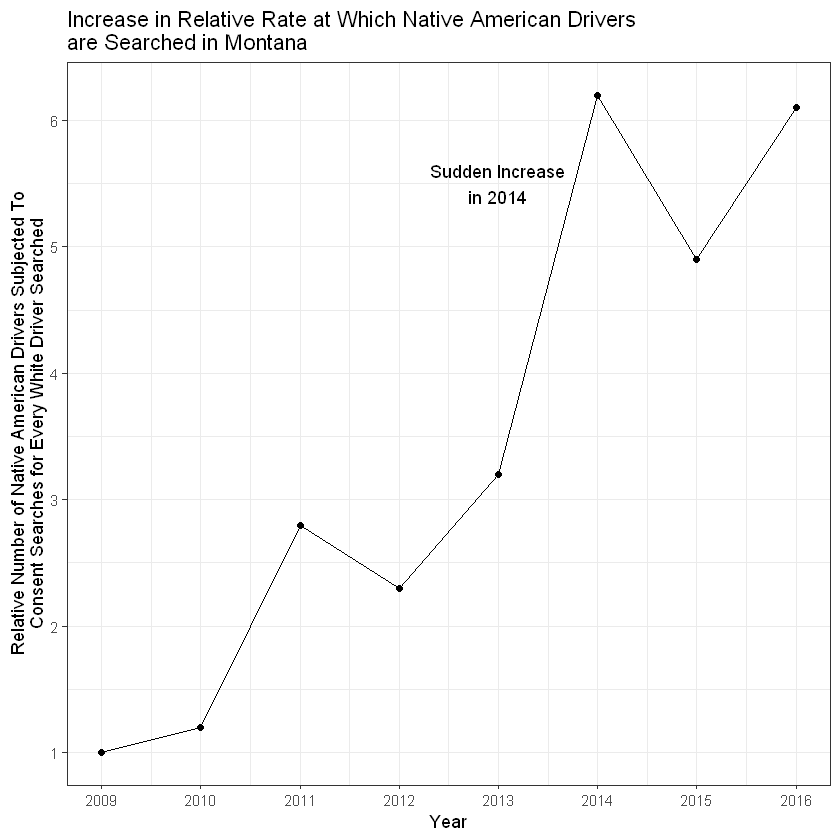

In [26]:
two_data %>%
    ggplot(aes(x = year, y = na_to_white_search_proportion)) +
    geom_point() +
    geom_line() +
    theme_bw() +
    scale_x_continuous(
    labels = two_data$year %>% as.character(),
    breaks = two_data$year
    ) +
    annotate(geom = "text", x = 2013, y = 5.5, label = "Sudden Increase\nin 2014") +
    scale_y_continuous(
        labels = c(1:6) %>% as.character(),
        breaks = c(1:6)
    ) +
    labs(
        title = "Increase in Relative Rate at Which Native American Drivers\nare Searched in Montana",
        x = "Year",
        y = "Relative Number of Native American Drivers Subjected To\nConsent Searches for Every White Driver Searched"
    )

#### 3) Native American and White Consent Search Rate On and Near Flathead Indian Reservation

SENTENCE: "In the highway patrol districts covering the Flathead Indian Reservation, a 1,900-square-mile expanse near the western border of the state, officers searched 30 of every 1,000 Native American drivers they stopped but only three of every 1,000 white drivers."

CHECKING:
* NA and White consent search rate in counties in/surrounding Flathead Indian Reservation

In [27]:
three_data <-
    data %>%
    group_by(raw_Race) %>%
    filter(raw_Race %in% c("W", "I"), county_name %in% flathead_counties) %>%
    summarise(
        total_stops = n(),
        consent_searches = sum(search_basis == "consent", na.rm = TRUE),
        consent_search_rate = (consent_searches/total_stops) * 100
    )

three_data

raw_Race,total_stops,consent_searches,consent_search_rate
I,7143,209,2.9259415
W,214210,553,0.2581579


In [28]:
three_na_csearch_rate <-
    three_data %>%
    filter(raw_Race == "I") %>%
    pull(consent_search_rate) %>%
    round(digits = 4)

three_w_csearch_rate <-
    three_data %>%
    filter(raw_Race == "W") %>%
    pull(consent_search_rate) %>%
    round(digits = 4)

#### Findings

In [29]:
paste0("Native American Consent Search Rate Around Flathead: ", three_na_csearch_rate, "%")
paste0("White Consent Search Rate Around Flathead: ", three_w_csearch_rate, "%")

paste0(
    "Native American drivers are subjected to consent searches ",
    round(three_na_csearch_rate/three_w_csearch_rate, digits = 1), 
    "x more often than White drivers around Flathead Indian Reservation."
)

[1] "Native American Consent Search Rate Around Flathead: 2.9259%"

[1] "White Consent Search Rate Around Flathead: 0.2582%"

[1] "Native American drivers are subjected to consent searches 11.3x more often than White drivers around Flathead Indian Reservation."

### 4) Proportion of Data Made up by Native Americans

SENTENCE: "Native American drivers made up less than 5% of Montana Highway Patrol traffic stops but more than 17% of consent searches in the state."

CHECKING:
* Proportion of Native Americans in the stops data
* Proportion of Native Americans in the consent search data

In [49]:
#Proportion of each race in the stops data
data <- filter(data, year(date) > 2009)
data %>% 
  count(raw_Race) %>% 
  mutate(prop_stops = n / sum(n))

raw_Race,n,prop_stops
NA,8,9.917278e-06
A,6588,8.166878e-03
B,8655,1.072925e-02
I,37882,4.696079e-02
U,2596,3.218157e-03
W,750944,9.309150e-01


In [36]:
#Proportion of each race after filtering to just consent searches

consent_searches_data <- data %>% filter(search_basis == 'consent')
consent_searches_data %>% 
  count(raw_Race) %>% 
  mutate(prop_consent = n / sum(n))

raw_Race,n,prop_consent
A,31,0.0141101502
B,92,0.0418752845
I,386,0.1756941284
U,2,0.0009103323
W,1686,0.7674101047


### 5) Arrest Rates

SENTENCE: "An analysis of the 500 arrests made following consent searches found a higher arrest rate for Native American drivers than white drivers. Three of every ten Native American drivers subject to a consent search were arrested, compared to only two of every ten white drivers subject to a consent search."

CHECKING:
* Arrest Rate for Native American drivers who were consent searched
* Arrest Rate for white drivers who were consent searched

In [33]:
consent_searches_data %>% 
  group_by(raw_Race) %>% 
  summarize(
    arrest_rate = mean(arrest_made, na.rm = T),
  )

raw_Race,arrest_rate
A,0.06060606
B,0.12903226
I,0.31958763
U,0.50000000
W,0.21461717


### 6) Consent Search Rate Around Flathead

SENTENCE: "Two patrol districts — District 1 and District 6 — bisect the Flathead Indian Reservation. Between 2010 and 2016, the search rate for Native American drivers in those districts was three times higher than the statewide search rate for Native American drivers. Meanwhile, officers searched white drivers travelling in the same territory at a rate consistent with the statewide trend."

CHECKING:
* Statewide consent search rate for Native American drivers
* Consent search rate for Native American drivers around Flathead
* Statewide consent search rate for white drivers
* Consent search rate for white drivvers around Flathead

In [50]:
#Statewide consent search rate for all races

data %>%
group_by(raw_Race) %>%
summarize(
    total_stops = n(),
    consent_searches = sum(search_basis == "consent", na.rm = T),
    consent_search_rate = (consent_searches/total_stops)
)

raw_Race,total_stops,consent_searches,consent_search_rate
NA,8,0,0.000000000
A,6588,31,0.004705525
B,8655,92,0.010629694
I,37882,386,0.010189536
U,2596,2,0.000770416
W,750944,1686,0.002245174


In [51]:
#Flathead consent search rate for all races

flat_head_data <- data %>% filter(county_name %in% flathead_counties)

flat_head_data %>%
group_by(raw_Race) %>%
summarize(
    total_stops = n(),
    consent_searches = sum(search_basis == "consent", na.rm = T),
    consent_search_rate = (consent_searches/total_stops)
)

raw_Race,total_stops,consent_searches,consent_search_rate
NA,2,0,0.000000000
A,1347,7,0.005196733
B,1361,21,0.015429831
I,6883,208,0.030219381
U,537,2,0.003724395
W,208580,549,0.002632084
